<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Решение конкурса на kaggle</b></h1>

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Первая часть. Исследование

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

### NaN Check

In [58]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1199,48,75.15,3772.65,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,One year,No,Electronic check,0
4481,48,55.80,2651.20,Male,0,Yes,Yes,Yes,No,DSL,No,Yes,Yes,No,No,No,One year,Yes,Credit card (automatic),0
1985,24,79.65,1928.70,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,0
4913,12,74.15,741.40,Male,0,Yes,No,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0
1236,1,45.30,45.30,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
3992,2,80.55,184.10,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,1
1741,43,99.30,4209.95,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
2531,26,100.50,2599.95,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
647,62,24.25,1424.60,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
3691,30,19.40,578.50,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Незаполненных значений (nan) в датасете нет. Но необходимо проверить значения, хранящиеся в категориальных переменных на наличие если незаполненные значения имеют значение отличное от nan

In [15]:
for cat in cat_cols:
    print(cat+ ': '+str(data[cat].unique())+', Unique values: '+str(len(data[cat].unique())))

Sex: ['Male' 'Female'], Unique values: 2
IsSeniorCitizen: [0 1], Unique values: 2
HasPartner: ['Yes' 'No'], Unique values: 2
HasChild: ['Yes' 'No'], Unique values: 2
HasPhoneService: ['Yes' 'No'], Unique values: 2
HasMultiplePhoneNumbers: ['No' 'Yes' 'No phone service'], Unique values: 3
HasInternetService: ['No' 'Fiber optic' 'DSL'], Unique values: 3
HasOnlineSecurityService: ['No internet service' 'No' 'Yes'], Unique values: 3
HasOnlineBackup: ['No internet service' 'No' 'Yes'], Unique values: 3
HasDeviceProtection: ['No internet service' 'No' 'Yes'], Unique values: 3
HasTechSupportAccess: ['No internet service' 'Yes' 'No'], Unique values: 3
HasOnlineTV: ['No internet service' 'No' 'Yes'], Unique values: 3
HasMovieSubscription: ['No internet service' 'No' 'Yes'], Unique values: 3
HasContractPhone: ['One year' 'Two year' 'Month-to-month'], Unique values: 3
IsBillingPaperless: ['No' 'Yes'], Unique values: 2
PaymentMethod: ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'B

*Как видим, и здесь нет аномальных данных или значений "заглушек" для отсутствующих значений.*



## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [36]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending
count,5282.000000,5282.000000
mean,32.397009,64.924754
std,24.550326,30.176464
min,0.000000,18.250000
25%,9.000000,35.462500
50%,29.000000,70.400000
75%,55.000000,90.050000
max,72.000000,118.750000


Данных о колонке TotalSpent нет, хотя она заявлена как числовая. Если посмотреть выше, то она является типом 'object', а не 'float'. Похоже, в ней содержатся также нечисловые значения

In [40]:
data.TotalSpent=data.TotalSpent.astype('float64')

ValueError: could not convert string to float: ' '

Среди значений есть также пробелы. Заменим строки с пробелом на 0

In [43]:
data.TotalSpent.replace(to_replace=' ', value='0',inplace=True)

In [50]:
data.TotalSpent=data.TotalSpent.astype('float64')

In [51]:
data[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161
std,24.550326,30.176464,2269.049195
min,0.000000,18.250000,0.000000
25%,9.000000,35.462500,395.725000
50%,29.000000,70.400000,1405.650000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


### Графики для числовых переменных

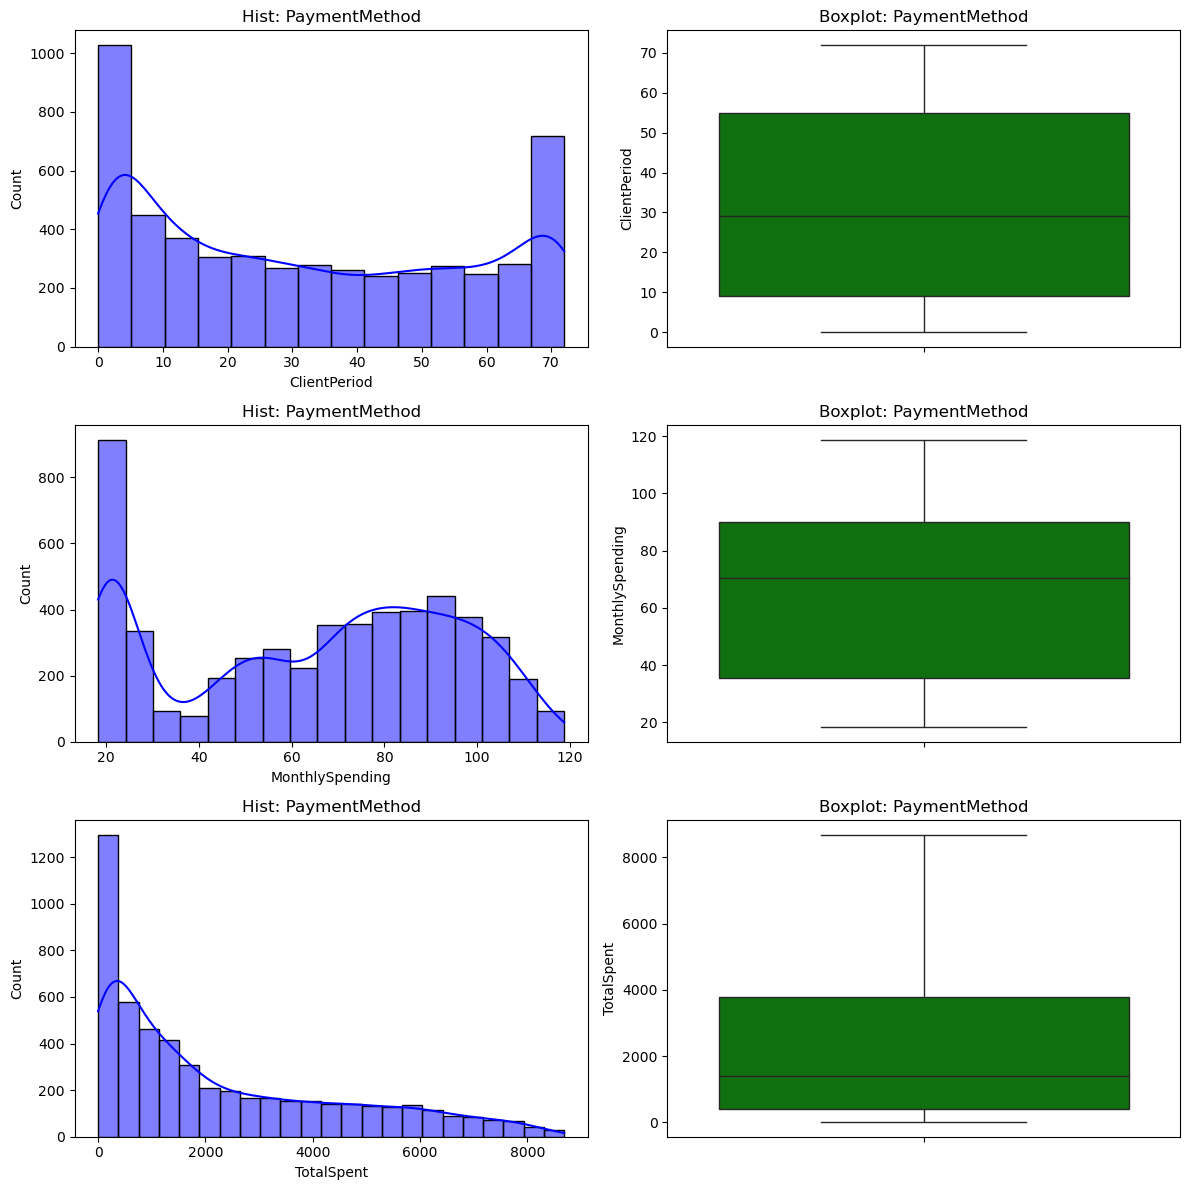

In [66]:
fig, axes =plt.subplots(len(num_cols),2, figsize=(12,4*len(num_cols)))
for i, ncol in enumerate(num_cols):
    sns.histplot(data=data, x=ncol, ax=axes[i, 0], kde=True, color='blue')
    axes[i, 0].set_title(f'Hist: {column}')
    
    sns.boxplot(data=data, y=ncol, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'Boxplot: {column}')
    
plt.tight_layout()
plt.show()

Вывод: выбросов среди числовых признаков нет

### Графики для категориальных переменных и целевой (Churn)

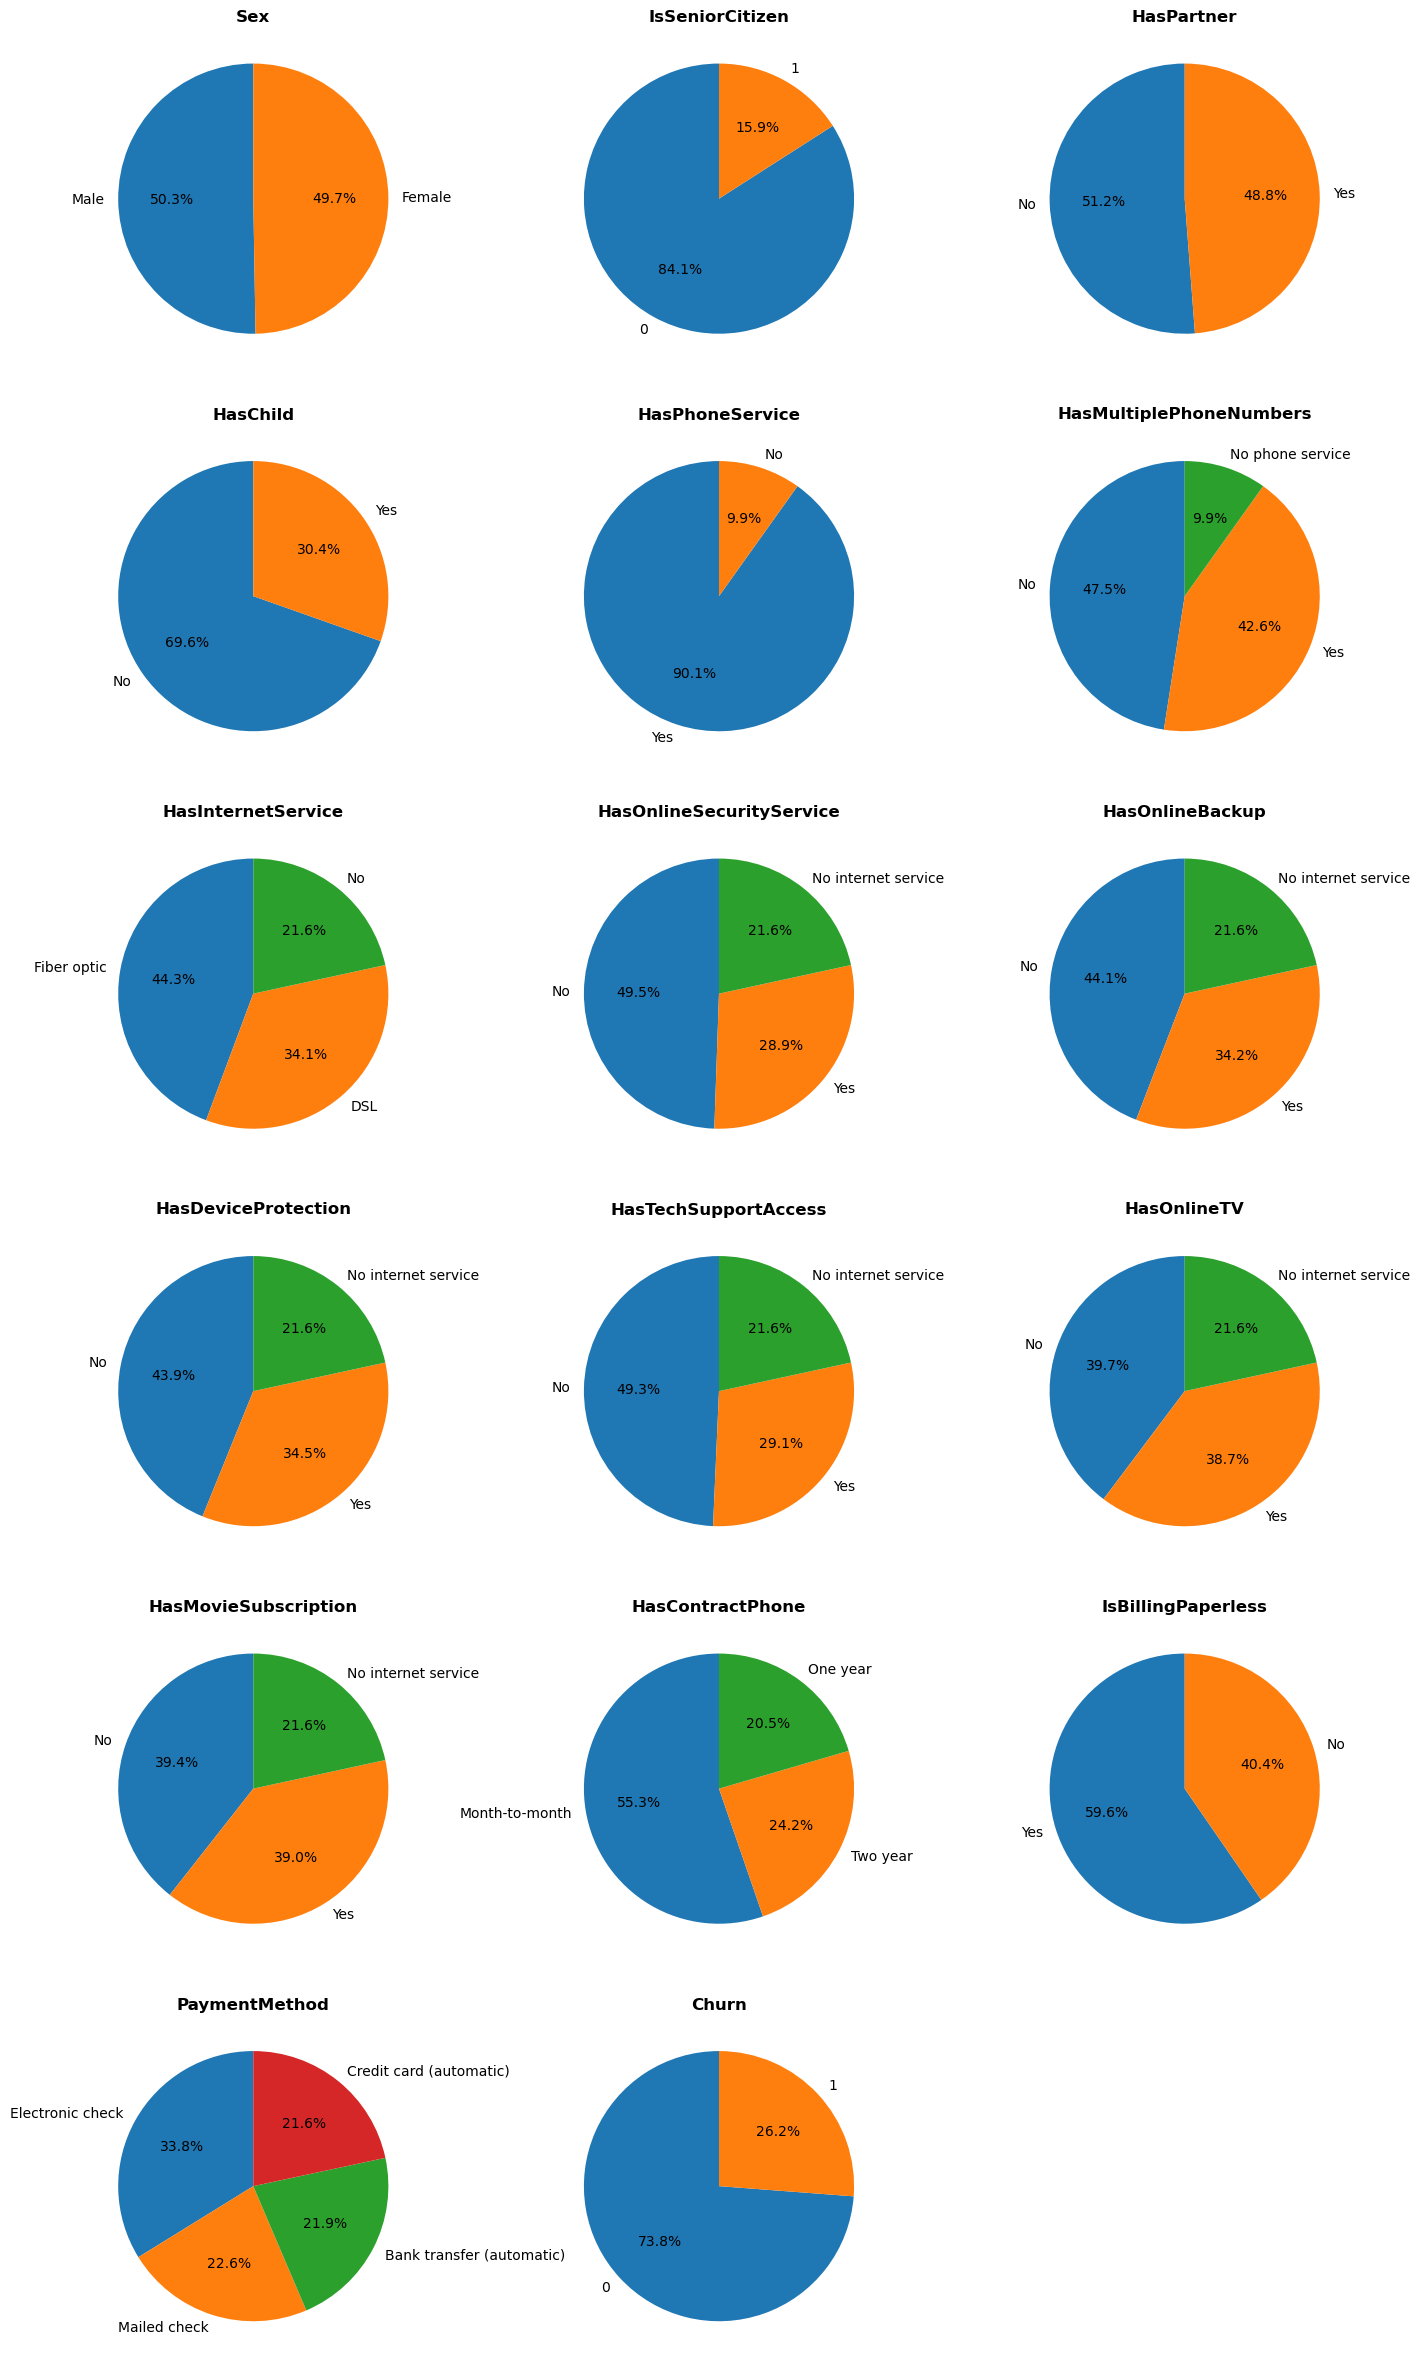

In [98]:
cat_df=data.drop(num_cols,axis=1)
n_cols = len(cat_df.columns)
n_rows = (n_cols +1) // 3  

fig, axes = plt.subplots(n_rows, 3, figsize=(14, 4 * n_rows))
axes = axes.flatten()  

for i, column in enumerate(cat_df.columns):
    value_counts = cat_df[column].value_counts()
    axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{column}', fontsize=12, fontweight='bold')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Распределние целевой переменной (*Churn*) является неравномерным (последний график) - только 26.2% пользователей ушло.

Также, для пользователей, которых нет интернета или телефона (поля HasPhoneService HasInternetService) в остальных признаках это явно указано. Можно заменить значения в признаках 'No internet service' или 'No phone service' на 'No'. Но это для блока ниже

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

**Проверка дубликатов**

In [105]:
print(f"Дублей: {data.duplicated(keep=False).sum()}")
print(f"Дублей (без учёта целевой переменной): {data.duplicated(subset=feature_cols, keep=False).sum()}")

Дублей: 28
Дублей (без учёта целевой переменной): 41


Есть дубли с противоречивым таргетом. Считаю необходимым удалить данные строки перед обучением модели логистической регрессии. 

In [118]:
duplicates_mask = data.duplicated(subset=feature_cols, keep=False)
duplicates_df = data[duplicates_mask]
grouped = duplicates_df.groupby(feature_cols)[target_col]
in_groups = grouped.filter(lambda x: x.nunique() > 1)
len(in_groups)

19

In [120]:
indx= in_groups.index
data = data.drop(indx)

**Замена значений в признаках**

В колонке `HasInternetService` есть значения *No*, но также есть и *DSL* и *Fiber optic*. Здесь сделаю ручной LabelEncoding, ибо оптоволоконный интернет шустрее чем DSL, что делает его выше рангом. 

Также для признака `HasContractPhone` можно допустить ручной LabelEncoding - всего 3 значения: месячная плата (*Month-to-month*), оплата на год (*One year*) или на два (*Two year*). Чем дольше срок заключения оплаты, тем выше вес клиента (будем считать его более финансово стабильным).

Для поля `PaymentMethod` будет сделано OHE в следующем блоке

In [124]:
patterns = {
    "Male": 0,
    "Female": 1,
    "No": 0,
    "Yes": 1,
    "No internet service": 0,
    "No phone service": 0,
    "DSL": 1,
    "Fiber optic": 2,
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2,
}
df = data.replace(patterns)

/var/folders/d3/wmmqppc90yqd4hftyc5nm_dr0000gn/T/ipykernel_1952/2145068133.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = data.replace(patterns)


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [151]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

Данные были подготовлены выше, за исключением OHE для параметра `PaymentMethod`. 

In [139]:
pm_dummies = pd.get_dummies(df['PaymentMethod'], dtype='int64', drop_first=True)
X=pd.concat([df.drop('PaymentMethod',axis=1),pm_dummies],axis=1)

Явное разделение на датафреймыс фичами и таргетом

In [141]:
y=X[target_col]
X=X.drop(target_col,axis=1)

Масштабирование

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    train_size=0.8,
                                                    random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Использование GridSearch

In [185]:
params = {
    'C':[100, 10, 1, 0.1, 0.01, 0.001], 
    'solver':['lbfgs', 'liblinear', 'saga']
}
gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=params,
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
    refit=True, 
    verbose=1
)
LR = gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [186]:
print(f"Лучшее качество: {LR.best_score_}")
print(f"Лучшие параметры: {LR.best_params_}")

Лучшее качество: 0.846001185375737
Лучшие параметры: {'C': 10, 'solver': 'lbfgs'}


**Проверка на тестовой выборке**

In [187]:
print(f"Значение ROC-AUC на тестовой выборке: {roc_auc_score(y_test, LR.predict_proba(X_test)[:, 1])}")

Значение ROC-AUC на тестовой выборке: 0.8456341572378078


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [154]:
# Основной датафрейм - data
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [157]:
import catboost 

In [155]:
boost_y= data[target_col]
boost_x = data.drop(target_col, axis =1)

**1.** Стандартные параметры

In [181]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(boost_x, boost_y, 
                                                    train_size =0.8, 
                                                    random_state=42)
cat_boost = catboost.CatBoostClassifier(cat_features= cat_cols,
                                        eval_metric='AUC',
                                        logging_level='Silent')

cat_boost.fit(X_train_b, y_train_b)
y_test_predicted = cat_boost.predict_proba(X_test_b)[:, 1]

In [182]:
print(f"ROC-AUC стандартной модели CatBoost: {roc_auc_score(y_test_b, y_test_predicted)}")

ROC-AUC стандартной модели CatBoost: 0.8419917761508374


**2.** Модель с раздичными параметрами

In [192]:
cb_parametered = catboost.CatBoostClassifier(cat_features= cat_cols,
                                        eval_metric='AUC',
                                        logging_level='Silent')
cb_params = {
    "n_estimators": [100, 250, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [4, 6, 10],
    "l2_leaf_reg": [1, 5, 10],
    "min_data_in_leaf": [50, 100, 500],
}
cb_parametered.grid_search(cb_params, X_train_b, y_train_b, cv=5, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8322617	best: 0.8322617 (0)	total: 689ms	remaining: 2m 46s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8430035	best: 0.8430035 (1)	total: 1.15s	remaining: 2m 18s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8454337	best: 0.8454337 (2)	total: 1.66s	remaining: 2m 12s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8202049	best: 0.8454337 (2)	total: 2.06s	remaining: 2m 3s
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
4:	loss: 0.8422043	best: 0.8454337 (2)	total: 2.49s

{'params': {'min_data_in_leaf': 50,
  'depth': 4,
  'learning_rate': 0.1,
  'l2_leaf_reg': 10,
  'iterations': 100},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
          

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

In [198]:
y_pred_proba_test = cb_parametered.predict_proba(X_test_b)[:, 1]
best_params = cb_parametered.get_all_params()
print(f"Лучшие параметры:")
for key in cb_params.keys():
    if key in best_params:
        print(f"  {key}: {best_params[key]}")

print(f"ROC-AUC на тестовой выборке: {roc_auc_score(y_test_b, y_pred_proba_test)}")    

Лучшие параметры:
  learning_rate: 0.10000000149011612
  depth: 4
  l2_leaf_reg: 10
  iterations: 100
  min_data_in_leaf: 50
ROC-AUC на тестовой выборке: 0.8447429363335491


# Предсказания

In [199]:
best_model = cb_parametered

In [200]:
X_test = pd.read_csv('./test.csv')

submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv("my_submission.csv", index=False)

Лучшее решение отправьте в Stepik.

**Результат от Stepik** ROC-AUC вашего решения равен 0.8495532107423328.